<a href="https://colab.research.google.com/github/niczos/music-recommender-system/blob/main/notebooks/music_recommender_triplet_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main binary classifier training notebook

In [1]:
# install package with the project
!pip install git+https://github.com/niczos/music-recommender-system.git >> log.txt

  Running command git clone --filter=blob:none --quiet https://github.com/niczos/music-recommender-system.git /tmp/pip-req-build-quf3f58f
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.4.0+cu121 requires torch==2.4.0, but you have torch 2.3.1 which is incompatible.


In [2]:
%load_ext autoreload
%autoreload 2
import scripts

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modeling

In [4]:
import os
PROJECT_PATH = "/content/drive/MyDrive/Music_recommender/"
DATA_PATH = os.path.join(PROJECT_PATH, "data")

In [5]:
import yaml
# Read YAML file
with open(os.path.join(PROJECT_PATH,"inference_config.yaml"), 'r') as stream:
    config = yaml.safe_load(stream)

In [6]:
config

{'annotations_file': '/content/drive/MyDrive/Music_recommender/data/metadata.csv',
 'music_dir': '/content/drive/MyDrive/Music_recommender/data/',
 'music_parts': ['Chorus', 'Verse'],
 'temp_dir': '/content/drive/MyDrive/Music_recommender/temp/',
 'models_path': '/content/drive/MyDrive/Music_recommender/models',
 'reference_music': 'Calla - Swagger',
 'batch_size': 2,
 'norm': 'cosine',
 'how_many': 5}

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/music_recommender/src/audio_processing.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  self.y, self.sample_rate = librosa.load(path=self.filepath)
/usr/local/lib/python3.10/dist-packages/music_recommender/src/audio_processing.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  self.y, self.sample_rate = librosa.load(path=self.filepath)
/usr/local/lib/python3.10/dist-packages/music_recommender/src/audio_processin

ValueError: too many values to unpack (expected 3)

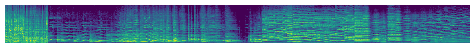

In [7]:
from music_recommender.scripts.triplet_training import main
main(config)